# Decision Tree Code

## Run necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.impute import KNNImputer
from skopt import BayesSearchCV

## Import raw dataset from google sheets (contains nulls)

In [2]:
#https://docs.google.com/spreadsheets/d/1ugUQfFC0dhDjX4wsapDx8kSIYoPSC9zHsQhtLkIMWIM/edit#gid=1386592801
sheet_id = '1ugUQfFC0dhDjX4wsapDx8kSIYoPSC9zHsQhtLkIMWIM'
xls = pd.ExcelFile(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx")
df = pd.read_excel(xls, 'removed_row_more_than_10_null', header = 0)                 
df

,t5_spring40,ancestry,heterozygosity,sex_binary,tarsus.length,fat.score,tail.length,wing.cord,kipps,distal,p9,p10,bearing_fall_1,doy_fall_r1
0,0,0.685,0.55,1,28.0,2.0,68.0,99,30.7,NaN,70.0,NaN,NaN,NaN
1,0,0.565,0.45,1,28.3,0.0,NaN,96,31.1,NaN,72.0,NaN,NaN,NaN
2,0,0.270,0.30,1,27.1,NaN,71.0,98,29.7,NaN,76.0,NaN,NaN,NaN
3,0,0.770,0.28,1,25.8,0.0,67.0,95,33.1,NaN,70.0,NaN,NaN,NaN
4,0,0.785,0.19,1,NaN,0.0,66.0,92,27.4,NaN,73.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0.795,0.33,1,27.0,NaN,69.0,96,30.8,63.2,73.0,14.0,137.754435,260.0
351,0,0.435,0.63,1,29.0,0.0,72.0,98,28.9,60.8,74.0,17.0,189.189906,261.0
352,0,0.685,0.51,0,28.3,0.0,67.0,92,27.2,59.8,71.0,14.0,130.681827,260.0
353,0,0.335,0.41,1,29.1,0.0,70.0,92,27.9,61.0,71.0,14.0,193.328933,254.0


## Impute nulls using KNN imputer

In [3]:
df_imputer_knn_sklearn = df.copy(deep=True)
knnimputer = KNNImputer(n_neighbors=5)
df_imputer_knn_sklearn.iloc[:,:] = knnimputer.fit_transform(df)
df_imputer_knn_sklearn

,t5_spring40,ancestry,heterozygosity,sex_binary,tarsus.length,fat.score,tail.length,wing.cord,kipps,distal,p9,p10,bearing_fall_1,doy_fall_r1
0,0.0,0.685,0.55,1.0,28.00,2.0,68.0,99.0,30.7,61.20,70.0,14.2,129.849353,260.4
1,0.0,0.565,0.45,1.0,28.30,0.0,69.8,96.0,31.1,58.80,72.0,14.8,146.790743,260.2
2,0.0,0.270,0.30,1.0,27.10,0.2,71.0,98.0,29.7,59.74,76.0,16.2,131.949563,260.0
3,0.0,0.770,0.28,1.0,25.80,0.0,67.0,95.0,33.1,59.06,70.0,14.0,136.120771,265.8
4,0.0,0.785,0.19,1.0,27.88,0.0,66.0,92.0,27.4,58.62,73.0,15.2,139.525729,257.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.0,0.795,0.33,1.0,27.00,0.6,69.0,96.0,30.8,63.20,73.0,14.0,137.754435,260.0
351,0.0,0.435,0.63,1.0,29.00,0.0,72.0,98.0,28.9,60.80,74.0,17.0,189.189906,261.0
352,0.0,0.685,0.51,0.0,28.30,0.0,67.0,92.0,27.2,59.80,71.0,14.0,130.681827,260.0
353,0.0,0.335,0.41,1.0,29.10,0.0,70.0,92.0,27.9,61.00,71.0,14.0,193.328933,254.0


## Export the imputed dataset to your specific file path

In [8]:
with pd.ExcelWriter('output.xlsx') as writer:
    df_imputer_knn_sklearn.to_excel(writer, sheet_name= 'df_imputer_knn_sklearn')
    
df_imputer_knn_sklearn.to_excel("/Users/sarahvastani/Desktop/df_imputer_knn_sklearn.xlsx")

## Name the X and y variables

In [4]:
X = df_imputer_knn_sklearn.drop('t5_spring40', axis=1).copy()
X

,ancestry,heterozygosity,sex_binary,tarsus.length,fat.score,tail.length,wing.cord,kipps,distal,p9,p10,bearing_fall_1,doy_fall_r1
0,0.685,0.55,1.0,28.00,2.0,68.0,99.0,30.7,61.20,70.0,14.2,129.849353,260.4
1,0.565,0.45,1.0,28.30,0.0,69.8,96.0,31.1,58.80,72.0,14.8,146.790743,260.2
2,0.270,0.30,1.0,27.10,0.2,71.0,98.0,29.7,59.74,76.0,16.2,131.949563,260.0
3,0.770,0.28,1.0,25.80,0.0,67.0,95.0,33.1,59.06,70.0,14.0,136.120771,265.8
4,0.785,0.19,1.0,27.88,0.0,66.0,92.0,27.4,58.62,73.0,15.2,139.525729,257.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0.795,0.33,1.0,27.00,0.6,69.0,96.0,30.8,63.20,73.0,14.0,137.754435,260.0
351,0.435,0.63,1.0,29.00,0.0,72.0,98.0,28.9,60.80,74.0,17.0,189.189906,261.0
352,0.685,0.51,0.0,28.30,0.0,67.0,92.0,27.2,59.80,71.0,14.0,130.681827,260.0
353,0.335,0.41,1.0,29.10,0.0,70.0,92.0,27.9,61.00,71.0,14.0,193.328933,254.0


In [5]:
y = df_imputer_knn_sklearn.drop(['ancestry', 'heterozygosity','sex_binary', 'tarsus.length', 'fat.score', 'tail.length', 
            'wing.cord', 'kipps', 'distal', 'p9', 'p10', 'bearing_fall_1', 'doy_fall_r1'], axis=1).copy()
y

,t5_spring40
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
350,0.0
351,0.0
352,0.0
353,0.0


## Use BayesSearchCV to find best hyperparameters

In [6]:
# Define the search space for hyperparameters
param_space = {
    'criterion': ['gini', 'entropy'],
    'max_depth': (2, 32),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'random_state' : (0, 42)
}

# Initialize the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Initialize BayesSearchCV with the DecisionTreeClassifier and the search space
opt = BayesSearchCV(
    dt_classifier,
    param_space,
    n_iter=100,  # Number of iterations for optimization
    cv=5,        # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    random_state=42      # Random state for reproducibility
)

# Fit the optimizer to the data
opt.fit(X, y)

# Get the best hyperparameters and the best score
best_params = opt.best_params_
best_score = opt.best_score_

print("Best Score:", best_score)
print("Best Hyperparameters:", best_params)

Best Score: 0.8253521126760562
Best Hyperparameters: OrderedDict([('criterion', 'gini'), ('max_depth', 24), ('min_samples_leaf', 19), ('min_samples_split', 8), ('random_state', 28)])


## Fit the model using the best hyperparameters

In [7]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with best hyperparameters. I left out the 'min_samples_leaf' because it resulted in a faulty decision tree.
best_clf = DecisionTreeClassifier(
    criterion='gini', 
    max_depth=24,       
    min_samples_split=8,    
    random_state=28
)

# Fit the classifier to your training data
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=24, min_samples_split=8, random_state=28)

## Find the accuracy of the model

In [8]:
# Fit the classifier on the entire dataset
best_clf.fit(X, y)

# Make predictions on the entire dataset
pred = best_clf.predict(X)

# Calculate accuracy score for the entire dataset
accuracy = accuracy_score(y, pred)

# Print the accuracy score
print("Accuracy score for the entire dataset:", accuracy)

Accuracy score for the entire dataset: 0.9436619718309859


## Plot the ROC AUC

In [9]:
# Evaluate AUC on the whole dataset
y_pred_proba = best_clf.predict_proba(X)[:, 1]
auc = roc_auc_score(y, y_pred_proba)
print("AUC on whole dataset:", auc)

AUC on whole dataset: 0.9835957282836068


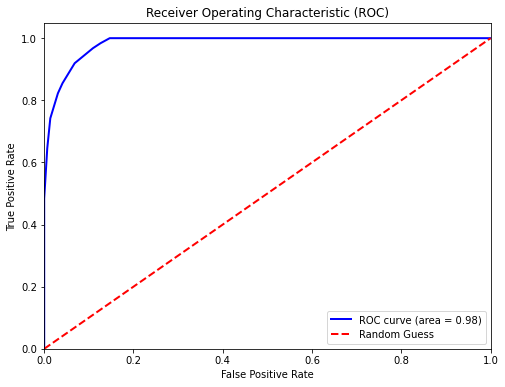

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities
y_pred_proba = best_clf.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)  # Ensure that auc is imported from sklearn.metrics

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Plot the confusion matrix

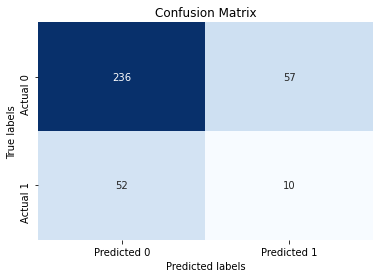

In [11]:
# Perform cross-validation to obtain predictions for all samples
y_pred_cv = cross_val_predict(best_clf, X, y, cv=5)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred_cv)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()